In [ ]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [ ]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

In [ ]:
# Put data in a pandas DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
# Add target and class to DataFrame
df['target'] = dataset.target

In [ ]:
# Show 10 random samples
random_subset = df.sample(n=10)
random_subset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0


In [ ]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [ ]:
# same process as always, identify your X's and your y's
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


LinearDiscriminantAnalysis()

In [ ]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Scale the X's
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
# apply the lda transformation
lda.fit(X_train, Y_train)
new_train_data = lda.transform(X_train)
print(lda.explained_variance_ratio_)

[0.9911804 0.0088196]


In [ ]:
# select 2 principal components
print("Feaatures in ", lda.n_features_in_, "Components out: ", len(lda.explained_variance_ratio_))

Feaatures in  4 Components out:  2


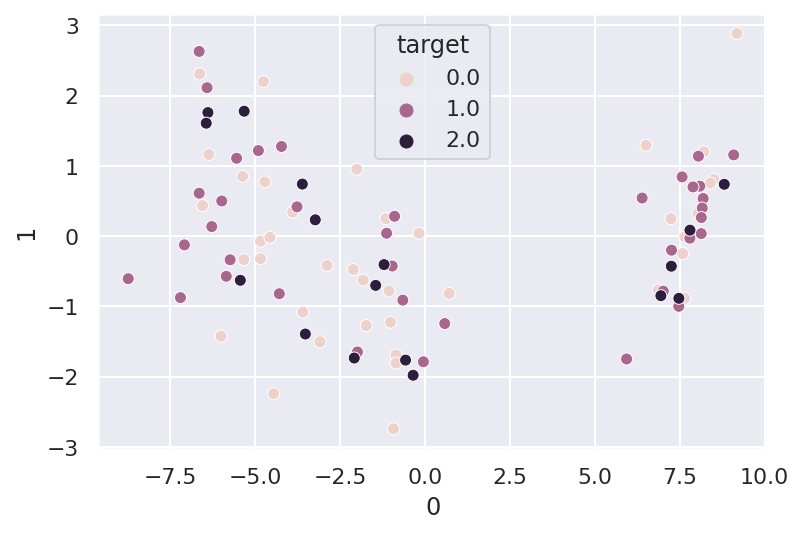

In [ ]:
# take a look at the new axes for the data and plot them
ndf = pd.DataFrame(new_train_data)
sns.scatterplot(x=ndf.iloc[:,0], y=ndf.iloc[:,1], hue=Y_train)
plt.show()

In [ ]:
# what about the variability?

In [ ]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(new_train_data, Y_train)

RandomForestClassifier()

In [ ]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?
new_test_data = lda.transform(X_test)

rf2 = RandomForestClassifier()
val = pd.DataFrame(X)
val = val[['sepal length (cm)', 'petal width (cm)']]
v_x_train, v_x_test, v_y_train, v_y_test = train_test_split(val, y, test_size=0.2) 
rf2.fit(v_x_train, v_y_train)

print(rf.score(new_test_data, Y_test), "vs" , rf2.score(v_x_test, v_y_test))

0.9333333333333333 vs 0.9666666666666667


The above seems unlikely 